<a href="https://colab.research.google.com/github/enidroman/data_607_data_acquisition_and_management/blob/main/Neural_Network_of_Handwritten_Digits_Model_Preparation_and_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K
import keras.utils
from keras import utils as np_utils
from keras.optimizers import SGD
from keras.utils import to_categorical
#  to split the data of training and testing sets 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


In [ ]:
import matplotlib.pyplot as plt

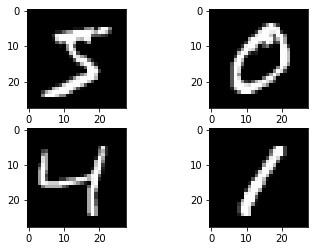

In [ ]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# conversion of class vectors to matrices of  binary class 

y_train = keras.utils.to_categorical(y_train, num_classes=None, dtype='float32')
y_test = keras.utils.to_categorical(y_test, num_classes=None, dtype='float32')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(to_categorical(1, 2))
print(to_categorical(0, 2))

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


[0. 1.]
[1. 0.]
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
469/469 [==============================] - 189s 401ms/step - loss: 2.2761 - accuracy: 0.1669 - val_loss: 2.2467 - val_accuracy: 0.2389
Epoch 2/10
469/469 [==============================] - 177s 377ms/step - loss: 2.2258 - accuracy: 0.2632 - val_loss: 2.1839 - val_accuracy: 0.3871
Epoch 3/10
469/469 [==============================] - 177s 377ms/step - loss: 2.1595 - accuracy: 0.3601 - val_loss: 2.0980 - val_accuracy: 0.5444
Epoch 4/10
469/469 [==============================] - 175s 372ms/step - loss: 2.0647 - accuracy: 0.4588 - val_loss: 1.9760 - val_accuracy: 0.6422
Epoch 5/10
469/469 [==============================] - 177s 377ms/step - loss: 1.9311 - accuracy: 0.5396 - val_loss: 1.8035 - val_accuracy: 0.6992
Epoch 6/10
469/469 [==============================] - 176s 375ms/step - loss: 1.7504 - accuracy: 0.5990 - val_loss: 1.5769 - val_accuracy: 0.7418
Epoch 7/10
469/469 [==============================] - 176s 375ms/step - loss: 1.5342 - accuracy: 0.6411 - val_loss: 1.3200 -

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 17.33%


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7696795463562012
Test accuracy: 0.8270999789237976
